LSTM vs Transformer

In [27]:
#imports
import os
import sys
sys.path.append(os.getenv("PROJECT_PATH"))

from utils.drawpitch import draw_pitch, draw_points_on_pitch,draw_paths_on_pitch
from utils.pitchconfig import SoccerPitchConfiguration

import pandas as pd
import numpy as np
import supervision as sv
import ast
import matplotlib.pyplot as plt
import cv2

df_tf = pd.read_csv("../../data/predicted/tf_pred_xy_comb.csv")
df_lstm = pd.read_csv("../../data/predicted/lstm_pred_xy_comb.csv")
df_og = pd.read_csv("../../data/train/train_interpolated_combined.csv")

In [28]:
#Supervision - virtualization
CONFIG = SoccerPitchConfiguration()

edge_annotator = sv.EdgeAnnotator(
    color=sv.Color.from_hex('#00BFFF'),
    thickness=2, edges=CONFIG.edges)
vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.from_hex('#FF1493'),
    radius=8)
vertex_annotator_2 = sv.VertexAnnotator(
    color=sv.Color.from_hex('#00BFFF'),
    radius=8)

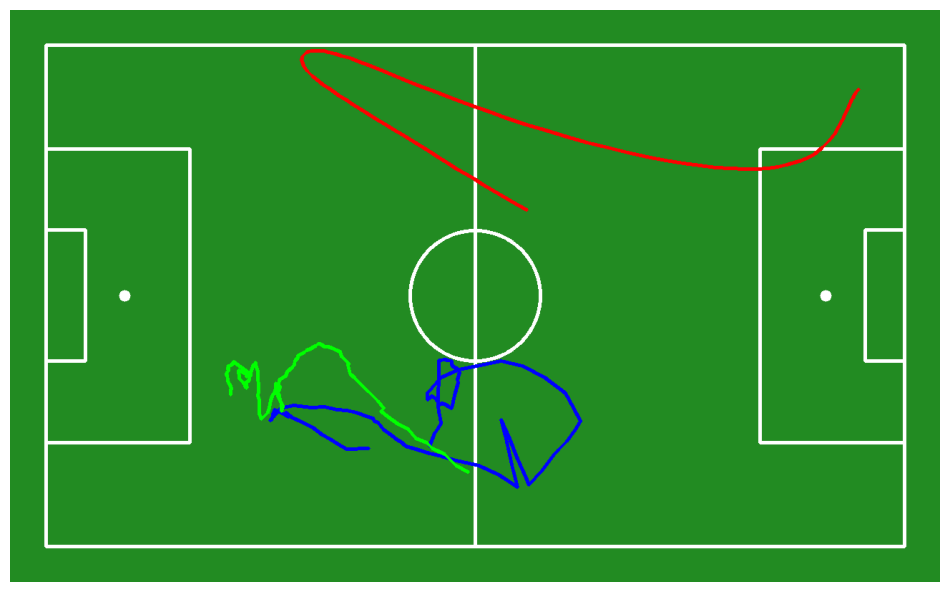

In [30]:
# Draw the pitch
CONFIG = SoccerPitchConfiguration()
annotated_frame = draw_pitch(CONFIG)

# Extract coordinates
true_ball_xy = df_tf['true_ball'].dropna().apply(ast.literal_eval).tolist()
lstm_ball_xy = df_lstm['ball'].dropna().apply(ast.literal_eval).tolist()
transformer_ball_xy = df_tf['pred_ball'].dropna().apply(ast.literal_eval).tolist()

# Convert to NumPy arrays
pitch_true_ball_xy = np.array(true_ball_xy)
pitch_lstm_ball_xy = np.array(lstm_ball_xy)
pitch_transformer_ball_xy = np.array(transformer_ball_xy)

# Draw the true path (blue)
annotated_frame = draw_paths_on_pitch(
    config=CONFIG,
    paths=[pitch_true_ball_xy],
    color=sv.Color.BLUE,
    thickness=4,
    pitch=annotated_frame
)

# Draw the LSTM predicted path (red)
annotated_frame = draw_paths_on_pitch(
    config=CONFIG,
    paths=[pitch_lstm_ball_xy],
    color=sv.Color.RED,
    thickness=4,
    pitch=annotated_frame
)

# Draw the Transformer predicted path (green)
annotated_frame = draw_paths_on_pitch(
    config=CONFIG,
    paths=[pitch_transformer_ball_xy],
    color=sv.Color.GREEN,
    thickness=4,
    pitch=annotated_frame
)

# Display the result
sv.plot_image(annotated_frame)
